# **Data-Driven Insights into Creditworthiness: An Exploratory Analysis of Paisabazaar Customer Data**

## **Introduction**

Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

## **Problem Statement**

This project studies Paisabazaar dataset to analyze customer financial and behavioral data to uncover the key factors influencing individual credit scores with the aim of improving credit risk evaluation.

## **Objectives**

1. To identify the demographic, financial, and behavioral factors affecting customers’ credit scores.

2. To explore relationships between income, debt, credit utilization, and repayment patterns.

3. To assess risk patterns across customer segments using visualization and group-based analysis.

4. To derive actionable insights that can guide lending strategies and personalized product recommendations.

5. To prepare the foundation for building predictive credit-score classification models.

## **Research Questions**

1. How do income and debt levels vary across different credit score categories?

2. Does payment behavior significantly affect creditworthiness?

3. What is the relationship between the number of loans or credit cards and the credit score?

4. How do credit utilization and delayed payments influence the likelihood of a good or poor credit score?

5. Can certain financial indicators (like debt-to-income ratio or monthly balance) help predict default risk?

## **Project Summary**

This project performs a detailed exploratory data analysis on Paisabazaar’s customer dataset to understand patterns in financial behavior and credit performance.


After cleaning and preprocessing the data, the analysis explores key variables such as income, outstanding debt, number of loans, payment behavior, and credit utilization ratio and more.

Through univariate and bivariate visualizations, the project highlights which customer attributes contribute most to good or poor credit scores.

The insights generated will help financial institutions minimize loan default risks, optimize credit scoring frameworks, and design more targeted financial products aligned with customer risk profiles.

## **Dataset Overview**

This dataset contains 28 variables capturing demographic, financial, behavioral, and credit performance indicators of Paisabazaar’s customers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset.csv')

In [ ]:
df_backup = df.copy()

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.dtypes

,0
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [ ]:
num_cols = df.select_dtypes(['int64', 'float64'])
num_cols

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089
1,5635,3392,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162
2,5636,3392,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863
3,5637,3392,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310
4,5638,3392,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228
99996,155626,37932,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610
99997,155627,37932,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,155628,37932,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979


In [ ]:
cat_cols = df.select_dtypes(['object'])
cat_cols

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments,Good
1,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...
99995,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99996,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Medium_value_payments,Poor
99997,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


## **Data Cleaning and Standardization**

In [ ]:
df = df_backup.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

In [ ]:
df.select_dtypes(include = ['int64', 'float64'])

,id,customer_id,month,age,ssn,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,5634,3392,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089
1,5635,3392,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162
2,5636,3392,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863
3,5637,3392,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310
4,5638,3392,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228
99996,155626,37932,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610
99997,155627,37932,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,155628,37932,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979


In [ ]:
object_cols = ['id', 'customer_id', 'ssn']
df[object_cols] = df[object_cols].astype('object')

In [ ]:
df.select_dtypes(include = ['object'])

,id,customer_id,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
0,5634,3392,Aaron Maashoh,821000265.0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments,Good
1,5635,3392,Aaron Maashoh,821000265.0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,5636,3392,Aaron Maashoh,821000265.0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,5637,3392,Aaron Maashoh,821000265.0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,5638,3392,Aaron Maashoh,821000265.0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,Nicks,78735990.0,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99996,155626,37932,Nicks,78735990.0,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Medium_value_payments,Poor
99997,155627,37932,Nicks,78735990.0,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,155628,37932,Nicks,78735990.0,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


In [ ]:
df.describe()

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
df.describe(include = ['object'])

,id,customer_id,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
count,100000,100000,100000,100000.0,100000,100000,100000,100000,100000,100000
unique,100000,12500,10128,12500.0,15,6261,3,3,6,3
top,155605,37932,Jessicad,78735990.0,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,48,8.0,7096,11408,45848,52326,28616,53174


## **Data Profiling**

In [ ]:
df.loc[:, 'credit_score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
df.loc[:, 'credit_mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df.loc[:, 'payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
np.sort(df.loc[:, 'num_of_delayed_payment'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [ ]:
array_of_loan_types = df.loc[:, 'type_of_loan'].unique()

In [ ]:
print(len(array_of_loan_types)) #there are 6261 types of loans

6261


In [ ]:
df.groupby('type_of_loan')['num_of_loan'].sum()

,num_of_loan
type_of_loan,
Auto Loan,1152.0
"Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan",64.0
"Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan",48.0
"Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan",72.0
"Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan",48.0
...,...
"Student Loan, and Mortgage Loan",384.0
"Student Loan, and Not Specified",320.0
"Student Loan, and Payday Loan",512.0


In [ ]:
df.loc[:, 'type_of_loan'].value_counts().sort_values(ascending = False).head(10)

,count
type_of_loan,
No Data,11408
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
Payday Loan,1200
Mortgage Loan,1176
Auto Loan,1152


In [ ]:
df.loc[:, 'name'].value_counts().sort_values(ascending = False).head(10)

,count
name,
Jessicad,48
Langep,48
Stevex,48
Jonesb,40
env,40
Lucia Mutikanip,40
Michaelr,40
Jessica Wohlt,40
Strupczewskid,40


In [ ]:
df.loc[:, 'occupation'].value_counts().sort_values(ascending = False)

,count
occupation,
Lawyer,7096
Engineer,6864
Architect,6824
Mechanic,6776
Accountant,6744
Scientist,6744
Media_Manager,6720
Developer,6720
Teacher,6672


In [ ]:
df.loc[:, 'credit_mix'].value_counts()

,count
credit_mix,
Standard,45848
Good,30384
Bad,23768


In [ ]:
df.loc[:, 'credit_score'].value_counts()

,count
credit_score,
Standard,53174
Poor,28998
Good,17828


In [ ]:
df.loc[:, 'payment_behaviour'].value_counts()

,count
payment_behaviour,
Low_spent_Small_value_payments,28616
High_spent_Medium_value_payments,19738
High_spent_Large_value_payments,14726
Low_spent_Medium_value_payments,14399
High_spent_Small_value_payments,11764
Low_spent_Large_value_payments,10757


In [ ]:
df.loc[:, 'payment_of_min_amount'].value_counts()

,count
payment_of_min_amount,
Yes,52326
No,35667
NM,12007


## **Handling Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

## **Handing null values**

In [ ]:
df.isnull().sum()

,0
id,0
customer_id,0
month,0
name,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
num_bank_accounts,0


## **Spotting and handling outliers**


In [ ]:
#we will write a function which can be applied to all the projects hereon.
def outlier_percentages_by_iqr(df): #takes the entire df as input
  numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns #as we have already cleand the data and we have columns purely with numeric value that make sense.
  outlier_stats = {} #initiate a dictionary that will then turn into df

  for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_rows = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_stats[col] = round(outlier_rows / len(df) * 100, 2) #col is key, outlier percentage rounded upto 2 decimals is the value of that key

  return pd.DataFrame(list(outlier_stats.items()), columns = ['Column' , '%_outliers']).sort_values(by = '%_outliers', ascending = False)


In [ ]:
outlier_report = outlier_percentages_by_iqr(df)
print(outlier_report)

                      Column  %_outliers
17           monthly_balance        7.40
12          outstanding_debt        5.27
15       total_emi_per_month        5.04
16   amount_invested_monthly        4.46
8        delay_from_due_date        4.00
3      monthly_inhand_salary        2.02
2              annual_income        2.00
11      num_credit_inquiries        0.79
10      changed_credit_limit        0.58
0                      month        0.00
1                        age        0.00
9     num_of_delayed_payment        0.00
6              interest_rate        0.00
5            num_credit_card        0.00
4          num_bank_accounts        0.00
7                num_of_loan        0.00
13  credit_utilization_ratio        0.00
14        credit_history_age        0.00


***after we get the proportion, we interpret it***.

<1% → Ignore (minimal effect)

1%-5% → Moderate → Capping is usually enough

>5% → High → Apply transformation (log or power) or combine with capping

***Decide Handling Strategy***

Capping (Winsorization):

  When column is numeric but not strictly positive, or slightly skewed.

  Good for timing, delay, counts, etc.

Log Transform:

  For highly skewed, positive-only monetary or ratio variables.

  Examples: Income, Outstanding_Debt, Monthly_Balance.

| Column                        | % Outliers | Action Needed                        | Why                                                                            | How to Cap                                                                                        |
| ----------------------------- | ---------- | ------------------------------------ | ------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------- |
| **Monthly\_Balance**          | 7.40%      | **Log Transform + Optional Capping** | Financial variable, positive & right-skewed. Outliers distort mean.            | Use `np.log1p()`, and optionally cap extreme high values at 1st & 99th percentile.                |
| **Outstanding\_Debt**         | 5.27%      | **Log Transform + Optional Capping** | Debt values can have a long tail. High-risk borrowers create extreme outliers. | Same as above: log transform, plus optional capping at 1st & 99th percentile.                     |
| **Total\_EMI\_per\_month**    | 5.04%      | **Log Transform + Optional Capping** | EMI amounts are strictly positive, skewed toward higher values.                | Apply `np.log1p()`, then cap beyond 99th percentile if still skewed.                              |
| **Amount\_invested\_monthly** | 4.46%      | **Capping (Winsorize)**              | Moderate outliers; distribution less skewed than debt/income.                  | Cap values below 1st percentile & above 99th percentile.                                          |
| **Delay\_from\_due\_date**    | 4.00%      | **Capping Only**                     | Represents counts/days; log transform doesn’t make sense.                      | Cap at reasonable bounds (e.g., 1st & 99th percentile, or max business-logic value like 60 days). |



In [ ]:
def cap_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return np.clip(series, lower, upper)


In [ ]:
# Apply capping
df['amount_invested_monthly'] = cap_outliers(df['amount_invested_monthly'])
df['delay_from_due_date'] = cap_outliers(df['delay_from_due_date'])

In [ ]:
# Log transform positive monetary columns
for col in ['monthly_balance', 'outstanding_debt', 'total_emi_per_month']:
    df[col] = np.log1p(df[col])  

    # Cap extreme values after log-transform
    df[col] = cap_outliers(df[col])

Before Analysis, we drop unnecessry columns

In [ ]:
df.drop(columns = ['id', 'name', 'ssn', 'customer_id'], inplace = True)

## **Univariate Analysis.**


### **1. Distribution of the target variable.**

In [ ]:
df['credit_score'].value_counts()

,count
credit_score,
Standard,53174
Poor,28998
Good,17828


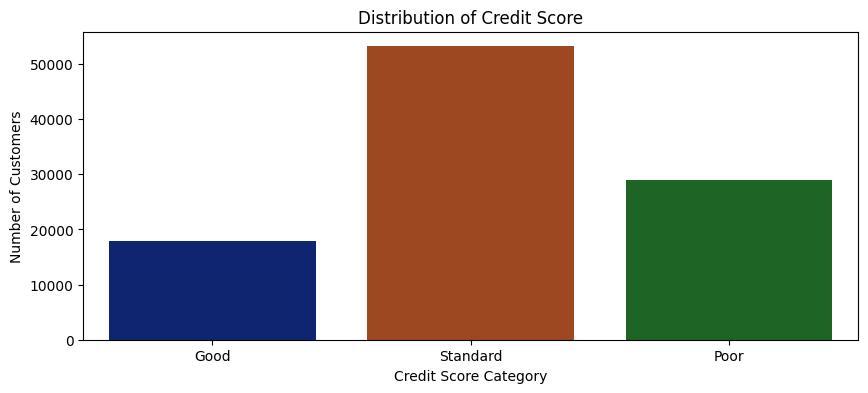

In [ ]:
plt.figure(figsize = (10, 4))
sns.countplot(x = 'credit_score', data = df, palette = 'dark')
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Number of Customers")
plt.show()

Insights:

Out of 100000 customers, >50% of customers come into standard category, followed by poor with ~30% customers. good credit score is for 17%- 18% of the customers. In order to advance with exploratory analysis, it is important for us to know the distribution of the target variable.

The credit score distribution in the dataset shows, ~53% customers are with 'standard' score, paisabazaar can study this to transfer these customers into 'good' scores. Similarly, ~29% are with poor credit score, which means they are greater risk of defaulting and this can result in losses for the business, so they can handle such customers strategically to avoid losses.


### **2. Distribution on Annual Income.**

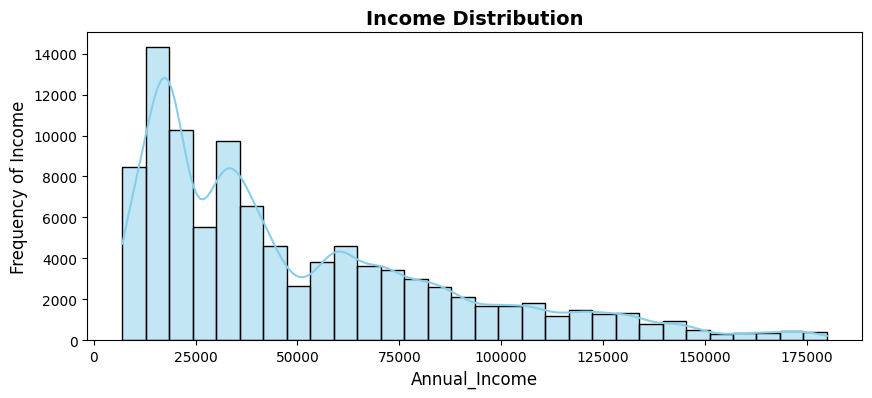

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(df['annual_income'], kde = True, bins = 30, color = 'skyblue') #inputs: data, kde = True, bins= the more the bins the more zoomed data, color
plt.title('Income Distribution', fontsize = 14, weight = 'bold')
plt.xlabel('Annual_Income', fontsize = 12)
plt.ylabel('Frequency of Income', fontsize = 12)
plt.show()

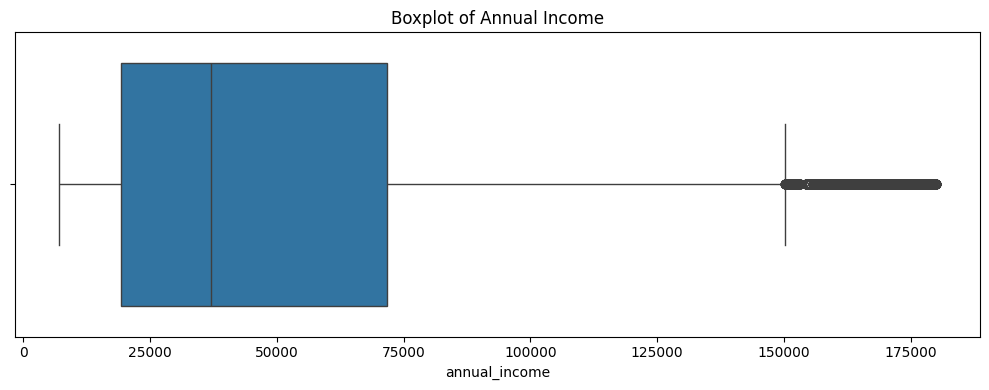

In [ ]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = df, x = 'annual_income')
plt.title("Boxplot of Annual Income")
plt.tight_layout()
plt.show()

Insights:

Pattern: Strong right skew — most customers earn in a low-to-mid range, few very high earners.

Insight: Outliers exist (super high income), but likely real.

The income is right skewed, which means the majority of customers falls in the lower incoke levels. There are customers with very high income strata, but they are comparitively less in proportion.

Annual Income is a solid indicator of economic standing of a person. Income determinates a person's spending capacity, debt repaying potential and a lot more. The 'good' scores come from higher income levels customers, whereas, the 'poot' scores come from lower income individuals. Paisabazaar can develop various policies to cater to the credit demands of the customers with all kinds of income levels. This will not only retain their customers but also increase their base.


### **3. Distribution of Credit Mix.**

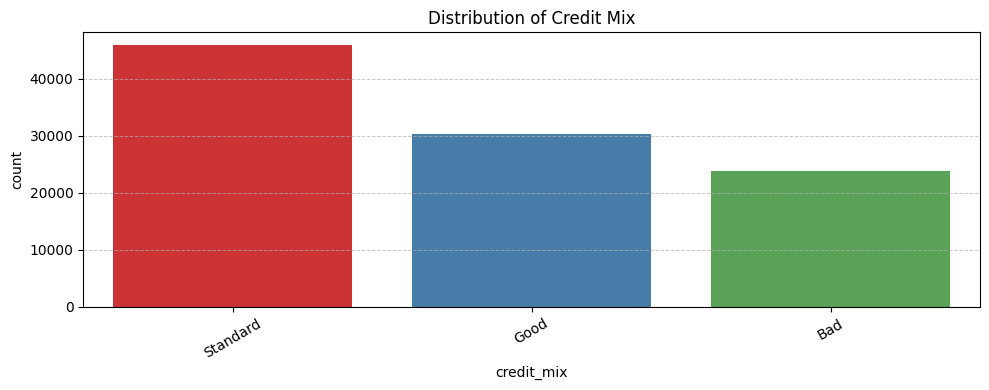

In [ ]:
#univariate on categrical is countplot/barplot.
plt.figure(figsize = (10, 4))
sns.countplot(x = df['credit_mix'], order = df['credit_mix'].value_counts().index, palette = 'Set1')
plt.title(f"Distribution of Credit Mix")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

Insights:

Majority of users are average in terms of credit health.
The company could focus on improving Standard customers to move them toward Good.

The Bad segment, though smaller, still represents a notable risk group — worth monitoring or offering credit improvement products.

Marketing campaigns could target Standard customers with incentives to improve credit mix (e.g., diversify credit types responsibly).

## **Bivariate Analysis**

For bivariate analysis we will do some feature engineering like creating calculated columns. then we will do the analysis.

### **1. How is credit score distributed among various occupations?**

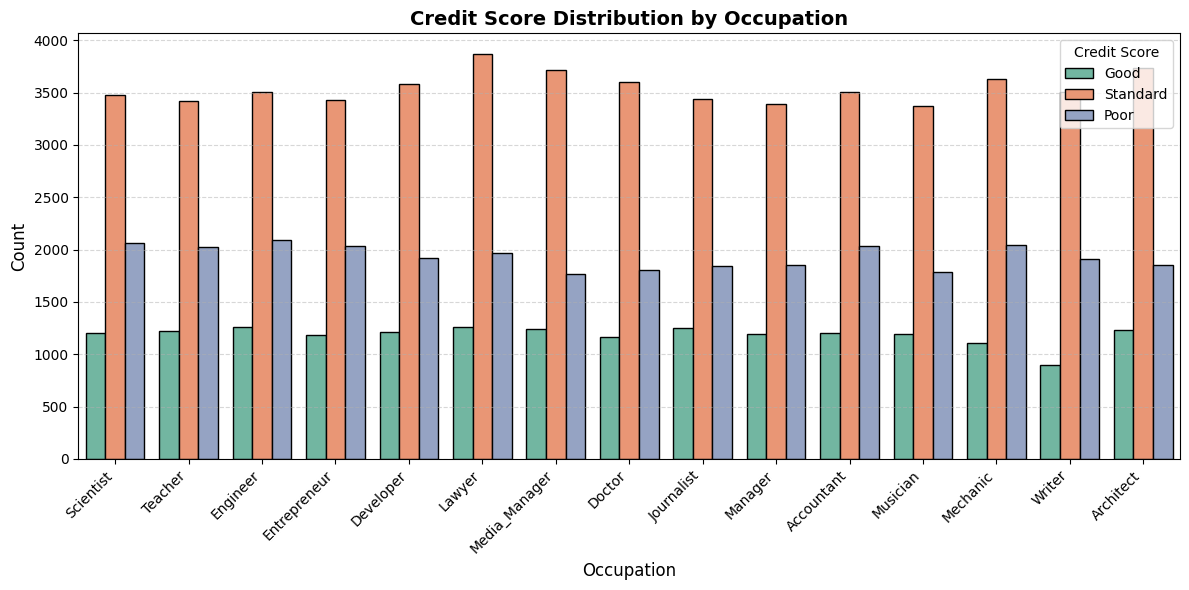

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    data = df,
    x = 'occupation',
    hue = 'credit_score',
    palette = 'Set2',
    edgecolor = 'black'
)
plt.title('Credit Score Distribution by Occupation', fontsize=14, weight='bold')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Credit Score', loc='upper right')
plt.tight_layout()
plt.show()

Insights:
*   Standard credit scores dominate across all occupations (~3500–3800).
*   Good credit scores form the smallest group across all jobs (~1000–1300 range).
*   Poor credit scores are the second-highest (~1800–2100) and fairly uniform across occupations.
*   Credit score appears to depend more on individual financial behavior than profession type.





### **2. How income do income levels affect customers’ credit scores — whether higher-income individuals tend to have better credit scores (“Good”) compared to lower-income groups (“Poor” or “Standard”).**

In [ ]:
income_by_score = df.groupby('credit_score')['annual_income'].mean().sort_values(ascending = False)
print(income_by_score)

credit_score
Good        65203.672105
Standard    50987.164840
Poor        40584.515325
Name: annual_income, dtype: float64


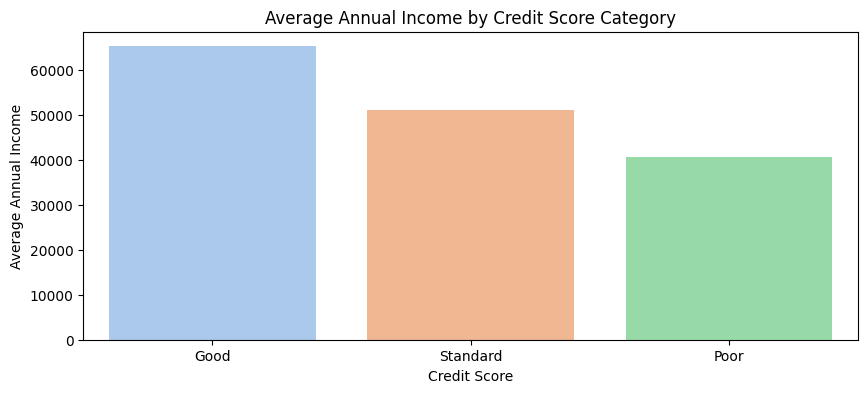

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="credit_score", y="annual_income", estimator="mean", ci=None, palette="pastel")
plt.title("Average Annual Income by Credit Score Category")
plt.xlabel("Credit Score")
plt.ylabel("Average Annual Income")
plt.show()


Insights:

*   “Good” scorers have higher mean income. This indicates income stability leads to better repayment capacity. Businesses should target these customers for premium credit products
*   “Poor” scorers show wider income spread. Which means financial instability — some may earn well but mismanage debt. This suggests need for financial education / counseling
*   “Standard” scorers are middle earners. these are people with average income with moderate risk. these customers could be moved to “Good” with personalized credit offers.

### **3. How do multiple loans affect credit scores?**

In [ ]:
loan_score = df.groupby("num_of_loan")["credit_score"].value_counts(normalize=True).unstack()

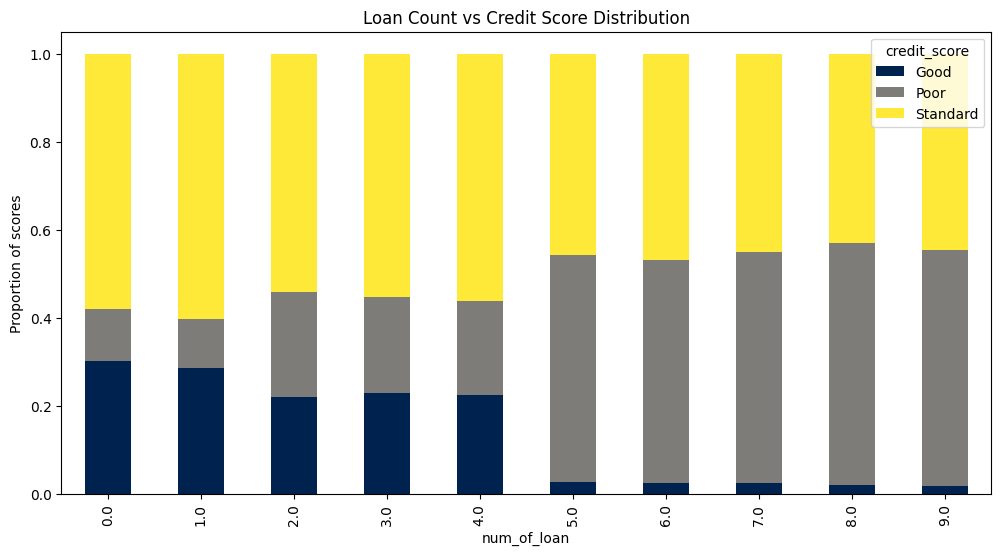

In [ ]:
loan_score.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="cividis")
plt.title("Loan Count vs Credit Score Distribution")
plt.ylabel("Proportion of scores")
plt.show()

Insights:

For less number of loans, the credit score is heavily populated by standard and good scores. but as the number of loans increase (5+), the proportion of 'Poor' credit score increases drastically. 'Good' scores are negligible. 'Standard' scores are less than poor scores.
This is a major red flag. It shows over leverage.

Paisabazaar can aim to make policies which restricts the loan to customers who already have certian number of debts (in paisabazaar or somewhere else), this will reduce the loss possibility.

### **4. How  does customers’ payment behaviour influences their average outstanding debt, does it have any impact on credit score?**

In [ ]:
pb_debt = df.groupby('payment_behaviour')['outstanding_debt'].mean().sort_values(ascending=False)

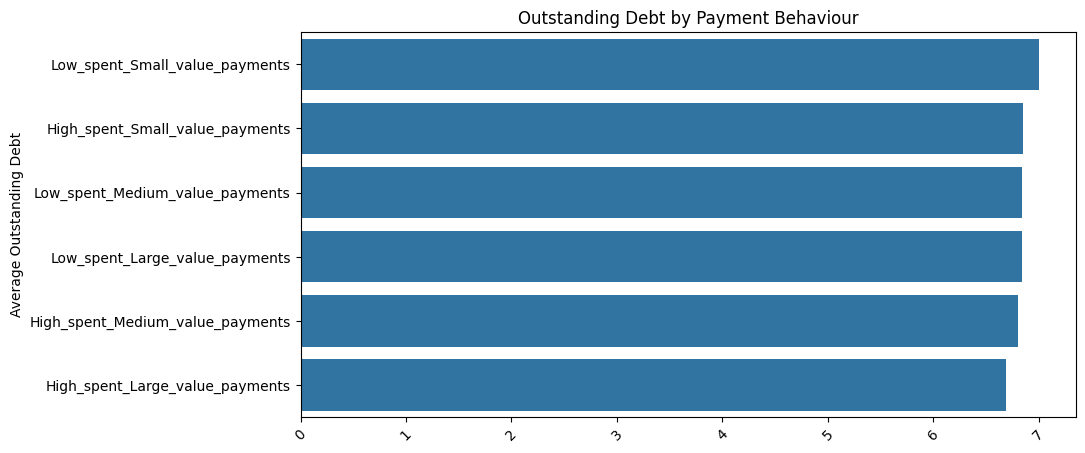

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=pb_debt.values, y=pb_debt.index)
plt.xticks(rotation=45)
plt.title("Outstanding Debt by Payment Behaviour")
plt.ylabel("Average Outstanding Debt")
plt.show()


Insights:

There is no significant variation in any of the kind, neither the spendign level nor the payment size show any dratic fluctuations in our sample.

For paisabazaar, this suggests that spending level (low/high) and payment size (small/medium/large) do not drastically affect outstanding debt in this sample — or that other factors (like income or credit utilization) may have a stronger influence.

So, other factors and their correlation might provide more valuable insights in this case.

### **5. How the Debt-to-Income Ratio (DTI) influences a person’s Credit Score, and whether high debt relative to income leads to poor credit behavio**r.

In [ ]:
#debt to income ratio
df['debt_to_income'] = df['outstanding_debt'] / df['annual_income']
avg_dti = df.groupby('credit_score')['debt_to_income'].mean().sort_values(ascending = False)
avg_dti

,debt_to_income
credit_score,
Poor,0.000332
Standard,0.000240
Good,0.000168


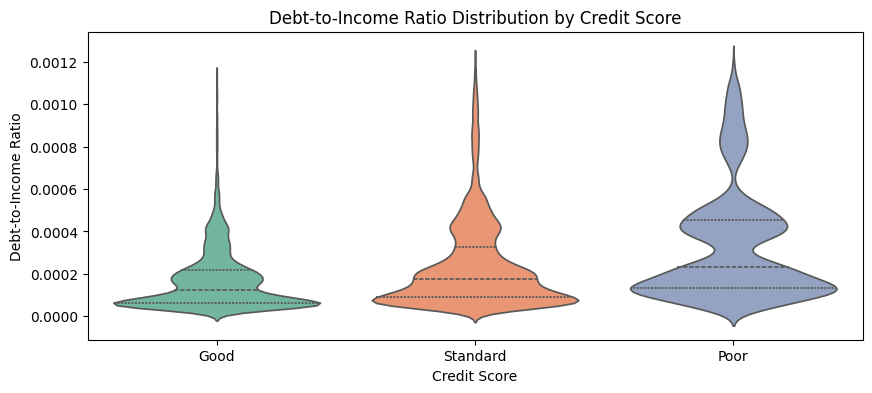

In [ ]:
plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x="credit_score", y="debt_to_income", palette="Set2", inner="quartile")
plt.title("Debt-to-Income Ratio Distribution by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

Insights:

The DTI shows the proporiton of outstanding debt to income of the customer. Naturally, more DTI refers to a person drowing in debt. This analysis reveals the same with more concrete numbers.

It can be seen from the shape and size of the voilins that individuals with lower debt-to-income ratios tend to maintain better credit scores.

It highlights how debt management relative to income is a key driver of creditworthiness.

Financial institutions can use this insight to assess repayment capacity and design income-adjusted loan offers.

### **6. Does the ratio of EMI-to-salary has any impact on credit scores of the customers?**

In [ ]:
#proportion of emi in the inhand salary
df['emi_to_salary'] = df['total_emi_per_month'] / df['monthly_inhand_salary']

In [ ]:
avg_emi_ratio = df.groupby('credit_score')['emi_to_salary'].mean().sort_values(ascending = False)
avg_emi_ratio

,emi_to_salary
credit_score,
Poor,0.002072
Standard,0.001500
Good,0.001053


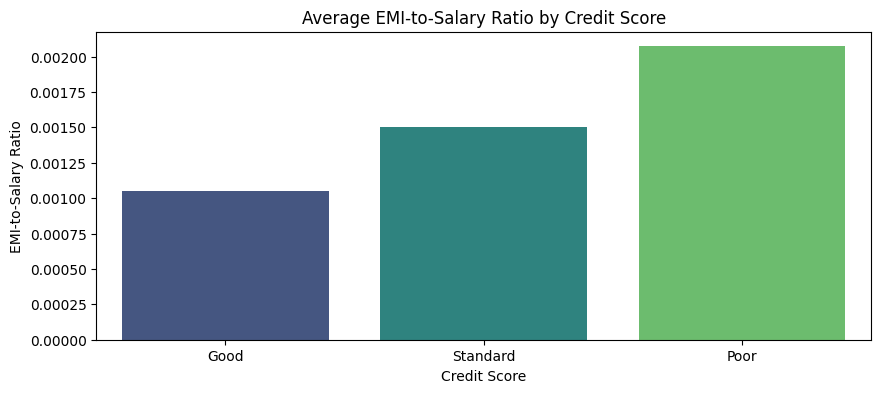

In [ ]:
plt.figure(figsize = (10, 4))
sns.barplot(data = df, x = 'credit_score', y = 'emi_to_salary', estimator = 'mean', ci= None, palette = 'viridis')
plt.title("Average EMI-to-Salary Ratio by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("EMI-to-Salary Ratio")
plt.show()

Insights:

The EMI-to-salary ration gives the proportion of income a customer spends each month on EMI payments — also known as the Debt Service Ratio (DSR). This ratio has inverse relationship with credit scores i.e. when EMI-to-Income ratio is high, the credit scores are 'Poor' and vice versa.

Customers with “Good” scores spend a smaller portion of their monthly income on loan repayments. On the other hand, A higher EMI-to-salary ratio indicates financial strain — customers have heavier repayment obligations compared to their income.
This reduces liquidity, increases the chance of delayed or missed payments, and eventually lowers credit score.

Insights for Paisabazaar:

Borrowers spending too much of their salary on EMIs are at higher default risk. So consider this as an indicator for loan disbursement

## **Multivariate Analysis**

In [ ]:
#number of months with delayed payments to total number of loan months
df['delayed_payment_freq'] = df['num_of_delayed_payment'] / df['credit_history_age']

In [ ]:
df_multi = df.select_dtypes(['int64', 'float64'])
df_multi

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,delayed_payment_freq,debt_to_income,emi_to_salary
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,6.698243,26.822620,265.0,3.923456,21.465380,5.747781,0.026415,0.000350,0.002150
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,6.698243,31.944960,266.0,3.923456,21.465380,5.654694,0.015038,0.000350,0.002150
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,6.698243,28.609352,267.0,3.923456,21.465380,5.805767,0.026217,0.000350,0.002150
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,6.698243,31.377862,268.0,3.923456,21.465380,5.413659,0.014925,0.000350,0.002150
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,6.698243,24.797347,269.0,3.923456,21.465380,5.836240,0.014870,0.000350,0.002150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,6.221345,34.663572,378.0,3.586404,24.028477,6.175589,0.018519,0.000157,0.001068
99996,5,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,6.221345,40.565631,379.0,3.586404,24.028477,6.209900,0.018470,0.000157,0.001068
99997,6,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,6.221345,41.255522,380.0,3.586404,24.028477,6.249607,0.015789,0.000157,0.001068
99998,7,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,6.221345,33.638208,381.0,3.586404,24.028477,5.768836,0.015748,0.000157,0.001068


<Axes: >

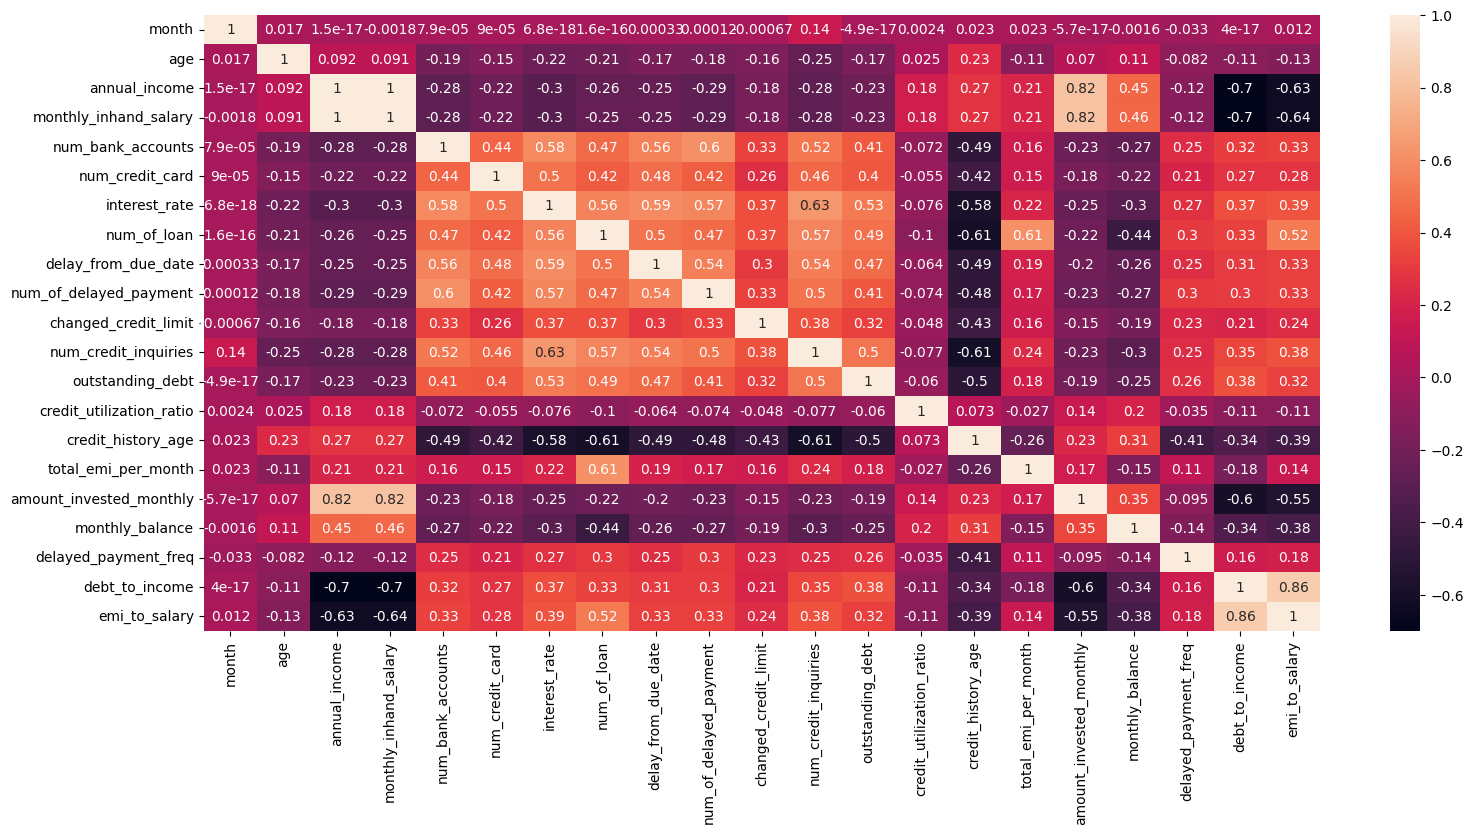

In [ ]:
#heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(df_multi.corr(),annot=True)

Insights:

We will analyze the main correlations here, which will serve as our basis for predictive modelling.

The matrix shows strong positive clusters among income-related variables and loan/credit-related variables. Similarly, negative correlations between income/savings vs debt/utilization indicators. Which is logical, but the numbers says the same.

The features 'num_credit_card', 'num_of_loan', 'interest_rate', 'num_credit_inquiries', 'outstanding_debt' are positively correlated ~0.4 - 0.6 which shows people with more loans and cards also have higher debt, more inquiries, and pay higher interest. This is a classic “credit appetite” cluster, representing individuals with multiple credit lines.

The 'credit history age' is negatively correlated to 'interest rates', 'num of loans' and 'debt to income' and positively correlated with 'annual income' and 'monthly inhand'. This is a stabilizing variable as it shows Longer history → financially stable, older, disciplined customers.

The 'debt_to_income' and' emi-to-salary' are orrelated extremely strongly with each other (≈ 0.86). Negatively correlated to income, salary, and balance.
The customers with high debt and EMI ratios usually have lower savings and income stability. These are strong predictors of “Poor” credit scores.



## **Conclusion**

 This project analyzed Paisabazaar dataset using data cleaning, visualization, and exploratory analysis. We examined patterns in credit scores, credit mix, annual income and other variables. The results showed that while the catalog is steady in its crdit distribution, a lot can be done to reduce the proportion of 'poor' credit scores'. Moreover, the customer base can be improved by promoting strategies to disburse more credit to potential seekers.

 Surprisingly, the indicatoes which were supposed to be determining the credit scores such as payment behaviour, spending behaviour have seen to have little to no impact on our target variable. this can be a sample. bias and need further study to reach any concrete conclusions. But the other indicators such as credit burden index have proven to be crucial in analyzing risks. using the insights from the analysis, Paisabazaar can build a predictive model which will accurately predict the risks, behaviors and other aspects which will strength the position of their business in financial sector.